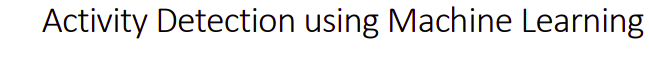


Human Activity Detection is the problem of predicting what a person is doing based on a trace of their movement using sensors.

The "Human Activity Detection Dataset" includes data collected from 34 subjects, each of whom were asked to perform 18 tasks for 3 minutes each. Each subject had a smartwatch placed on his/her dominant hand and a smartphone in their pocket. The data collection was controlled by a custom-made app that ran on the smartphone and smartwatch. The sensor data that was collected was from the accelerometer and gyroscope on both the smartphone and smartwatch, yielding four total sensors. The sensor data was collected at a rate of 20 Hz (i.e., every 50ms). The smartphone was either the Google Nexus 5/5X or Samsung Galaxy S5 running Android 6.0 (Marshmallow). The smartwatch was the LG G Watch running Android Wear 1.5. The general characteristics of the data and data collection process are summarized in Table 1. More detailed information is presented later in this document.




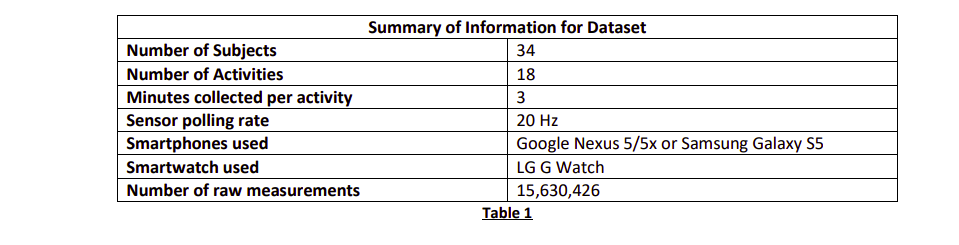

Table 2 lists the 18 activities that were performed. The actual data files specify the activities using the code from Table 2. Similar activities are not necessarily grouped together (e.g., eating activities are not all together). 

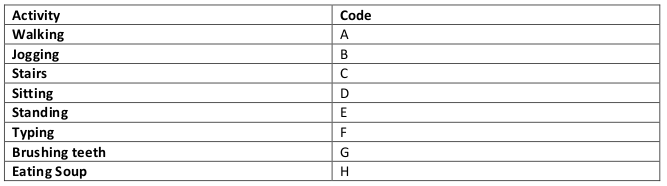

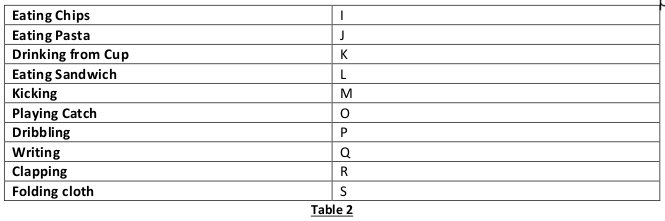

In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def process(path):
    train = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.txt'):
                with open(os.path.join(root, file), 'r') as f:
                    text = f.read()
                    temp = text.split(';\n')
                    final = []
                    for i in range (len(temp)):
                        a = temp[i].split(',')
                        final.append(a)
                
                    train = train[:] + final
                    
    return train

## Data Processing(Train) 

In [3]:
train_phone_accel = process('/content/drive/MyDrive/Raw/raw/train/phone/accel')
train_phone_gyro = process('/content/drive/MyDrive/Raw/raw/train/phone/gyro')
train_watch_accel = process('/content/drive/MyDrive/Raw/raw/train/watch/accel')
train_watch_gyro = process('/content/drive/MyDrive/Raw/raw/train/watch/gyro')


In [4]:
train_watch_accel[:5]

[['1600', 'A', '90426708196641', '7.091625', '-0.5916671', '8.195502'],
 ['1600', 'A', '90426757696641', '4.972757', '-0.15831658', '6.6967316'],
 ['1600', 'A', '90426807196641', '3.25372', '-0.19183542', '6.107758'],
 ['1600', 'A', '90426856696641', '2.801216', '-0.15592238', '5.997625'],
 ['1600', 'A', '90426906196641', '3.7708676', '-1.0513538', '7.731027']]

In [5]:
train = train_phone_accel + train_phone_gyro + train_watch_accel + train_watch_gyro
len(train)

5575090

In [6]:
def transform(data):
    data = pd.DataFrame(data, columns = ['Subject-id', 'Activity Label', 'Timestamp', 'x', 'y', 'z'])
    return data

In [7]:
train = transform(train)

In [8]:
train.head()

,Subject-id,Activity Label,Timestamp,x,y,z
0,1600,A,252207666810782,-0.36476135,8.793503,1.0550842
1,1600,A,252207717164786,-0.8797302,9.768784,1.0169983
2,1600,A,252207767518790,2.0014954,11.10907,2.619156
3,1600,A,252207817872794,0.45062256,12.651642,0.18455505
4,1600,A,252207868226798,-2.1643524,13.928436,-4.4224854


In [9]:
label = train['Activity Label'].unique()

In [10]:
l={}
n=0
for i in label:
    l[i] = n+1
    n+=1

train['Activity Label'] = train['Activity Label'].apply(lambda x: l[x])

# Data Processing(Test) 

In [11]:
test_phone_accel = process('/content/drive/MyDrive/Raw/raw/test/phone/accel')
test_phone_gyro = process('/content/drive/MyDrive/Raw/raw/test/phone/gyro')
test_watch_accel = process('/content/drive/MyDrive/Raw/raw/test/watch/accel')
test_watch_gyro = process('/content/drive/MyDrive/Raw/raw/test/watch/gyro')

In [12]:
test = test_phone_accel + test_phone_gyro + test_watch_accel + test_watch_gyro
len(test)

4266387

In [13]:
test = transform(test)

In [14]:
test = test.dropna(subset = ['Subject-id','Timestamp', 'Activity Label','x', 'y', 'z'])
test

,Subject-id,Activity Label,Timestamp,x,y,z
0,1626,A,598597208843465,0.9716797,-9.693069,3.1213531
1,1626,A,598597259197469,-1.5618439,-10.98436,-0.04689026
2,1626,A,598597309551473,-2.8281555,-13.751923,-0.44725037
3,1626,A,598597359905477,-0.018310547,-11.793289,-2.0324097
4,1626,A,598597410259481,1.9628296,-6.593796,-1.6802521
...,...,...,...,...,...,...
4266381,1630,S,1332623330811319,0.4886669,-0.35993102,1.3997455
4266382,1630,S,1332623380731299,1.0905412,-0.4504785,0.8532648
4266383,1630,S,1332623430651279,0.5600396,0.05019579,0.8873533
4266384,1630,S,1332623480571259,-0.53505224,-0.21931611,0.4410075


In [15]:
test['Timestamp'] = pd.to_numeric(test["Timestamp"])
test

,Subject-id,Activity Label,Timestamp,x,y,z
0,1626,A,598597208843465,0.9716797,-9.693069,3.1213531
1,1626,A,598597259197469,-1.5618439,-10.98436,-0.04689026
2,1626,A,598597309551473,-2.8281555,-13.751923,-0.44725037
3,1626,A,598597359905477,-0.018310547,-11.793289,-2.0324097
4,1626,A,598597410259481,1.9628296,-6.593796,-1.6802521
...,...,...,...,...,...,...
4266381,1630,S,1332623330811319,0.4886669,-0.35993102,1.3997455
4266382,1630,S,1332623380731299,1.0905412,-0.4504785,0.8532648
4266383,1630,S,1332623430651279,0.5600396,0.05019579,0.8873533
4266384,1630,S,1332623480571259,-0.53505224,-0.21931611,0.4410075


In [16]:
label = test['Activity Label'].unique()
label

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'O', 'P', 'Q', 'R', 'S'], dtype=object)

In [17]:
l={}
n=0
for i in label:
    l[i] = n+1
    n+=1

test['Activity Label'] = test['Activity Label'].apply(lambda x: l[x])

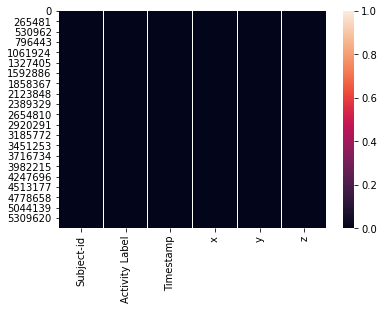

In [18]:
sns.heatmap(train.isnull())

# Data Processing(Timestsmp)

In [19]:
train['Timestamp'] = pd.to_numeric(train["Timestamp"])
train['Subject-id']=pd.to_numeric(train["Subject-id"])
train['x']=pd.to_numeric(train["x"])
train['y']=pd.to_numeric(train["y"])
train['z']=pd.to_numeric(train["z"])
train['Timestamp'] = train['Timestamp'].fillna(0)
train['Subject-id'] = train['Subject-id'].fillna(0)
train['x'] = train['x'].fillna(0)
train['y'] = train['y'].fillna(0)
train['z'] = train['z'].fillna(0)

In [20]:
train.drop(columns="Subject-id",inplace=True) 
test.drop(columns="Subject-id",inplace=True)


In [21]:
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)
train

,Activity Label,Timestamp,x,y,z
0,3,8.451035e+13,19.626020,-1.576582,-2.059163
1,13,1.581494e+13,4.516811,1.031452,-0.693121
2,3,7.986754e+13,12.787282,-1.876007,-0.539892
3,8,1.097778e+14,0.507058,0.142483,-0.085942
4,16,1.983088e+14,0.001068,-0.003815,0.000580
...,...,...,...,...,...
5575085,13,2.659139e+14,1.731055,-0.627707,-0.158458
5575086,6,8.529409e+13,-0.107776,9.357342,4.057163
5575087,12,1.649760e+13,8.421494,2.829102,2.953125
5575088,2,6.167217e+14,7.984364,2.543390,0.103848


In [22]:
data=pd.DataFrame()
data=pd.concat([train,test])
data

,Activity Label,Timestamp,x,y,z
0,3,8.451035e+13,19.626,-1.57658,-2.05916
1,13,1.581494e+13,4.51681,1.03145,-0.693121
2,3,7.986754e+13,12.7873,-1.87601,-0.539892
3,8,1.097778e+14,0.507058,0.142483,-0.0859418
4,16,1.983088e+14,0.00106812,-0.0038147,0.000579834
...,...,...,...,...,...
4266326,6,1.709643e+14,0.08628642,-0.3685815,0.026631612
4266327,15,1.148624e+13,4.0608654,-16.199469,-3.958663
4266328,4,6.962846e+14,-0.14815484,-0.025846245,0.06416487
4266329,16,1.707235e+14,-6.3697734,7.386112,0.4758476


## Split Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y=data["Activity Label"]
x=data.drop(columns="Activity Label")
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size = 0.7, random_state =  51)

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

## Accuracy

In [27]:
classifier.score(x_test,y_test)

0.784070529093522

## Save file in CSV format

In [28]:
import pickle
model = 'final_model.sav'
pickle.dump(classifier, open(model, 'wb'))


In [29]:
y= classifier.predict(x_test)

In [30]:
df = pd.DataFrame(y)

In [31]:
df.to_csv('answer.csv')